# PHYS 210 Mini-Project 05
### Diffusion
Due Wed, Dec 07, 2022 - 9am

In [1]:
# Main code and animation here
"""This code simulates a the diffusion of a dye in a 2 dimensional
1x1 dish of water across 100 seconds with diffusion constant D = 0.001
The dish is modelled as a square grid 101 points wide with reflecting
boundary conditions. An animation of the simulation will be produced
and the distribution of the dye particle concentration will be
fitted to a gaussian distribution at multiple time intervals."""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit as fit
from IPython.display import HTML

D = 0.001  # diffusion constant
L = 1  # length of dish
# number of points along side of square dish (including phantom points)
N = 101
tmax = 100  # end time of simulation
dt = 0.01  # size of timestep
steps = int(tmax / dt)  # number of steps in simulation
framesteps = int(0.2 / dt)  # number of steps per frame
# the steps for which to fit the concentration to the gaussian distribution
gsteps = np.asarray(np.linspace(np.sqrt(0.01), np.sqrt(10), 30)**2 / dt,
                    dtype=int)

xarr = np.linspace(0, L, N)  # array used for fitting gaussian distribution
tarr = gsteps * dt  # array used for plotting simualtion std data

guesses = (4, 1)  # initial guesses for gaussian fit

dx = L / N  # x step
dy = L / N  # y step

# defines starting conditions for concentration array C
C = np.zeros(shape=(N, N))
C[N // 2, N // 2] = 10

fig = plt.figure(0)  # defines a figure fopr use in animation

ims = []  # empty list used for animation frames

stds = []  # empty list used for fitted standard deviations

pc = []  # empty list used for sums of concentration array


# From https://www.geeksforgeeks.org/python-gaussian-fit/
def gaussian(x, A, sigma):
    """Gaussian distribution fitting function.

    x: the position of distribution value.
    A: the amplitude of the gaussian distribution.
    sigma: the standard deviation of the gaussian distribution.

    returns the gaussian distribution value"""
    return A * np.exp(-(x - L / 2)**2 / (2 * sigma**2))


for s in range(steps + 1):
    pc.append(np.sum(C[1:-1, 1:-1]))  # appends total concentration

    Cc = np.copy(C)  # copys concentration array

    # updates all real points in C based on diffusion equation
    C[1:-1, 1:-1] = D * dt * (
        (Cc[1:-1, 2:] + Cc[1:-1, 0:-2] - 2 * Cc[1:-1, 1:-1]) / dx**2 +
        (Cc[2:, 1:-1] + Cc[0:-2, 1:-1] - 2 * Cc[1:-1, 1:-1]) / dy**2) + Cc[
            1:-1, 1:-1]

    del Cc  # deletes copy of C to save memory

    # sets boundary points to be reflections of adjacent 'real' points
    C[:, 0] = C[:, 1]
    C[:, -1] = C[:, -2]
    C[0, :] = C[1, :]
    C[-1, :] = C[-2, :]

    # tests if this step should be an animated frame
    if s % framesteps == 0:
        # appends frame as a heatmap tuple
        ims.append((plt.pcolormesh(C, cmap='magma'), ))

    # tests if this step should be fitted to a gaussian distribution
    if s in gsteps:
        garr = C[N // 2, :]  # extracts the desired dish region, C(x, L/2, t)
        # fits region of C to gaussian distribution
        params, pcov = fit(gaussian, xarr, garr, p0=guesses)
        # appends standard deviation of fit to a list
        stds.append(np.absolute(params[1]))
        # updates new guesses to old parameters
        guesses = np.copy(params)

# animates the frames stored in ims
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat=False)
# saves animation as a webm file to drive
ani.save('Diffusion.webm', extra_args=['-vcodec', 'libvpx'])
del ani  # deletes animation from memory
plt.close()  # prevents stray plot from appearing

# displays animation in notebook
HTML('<video controls> <source src="Diffusion.webm" ' +
     'type="video/webm"></video>')

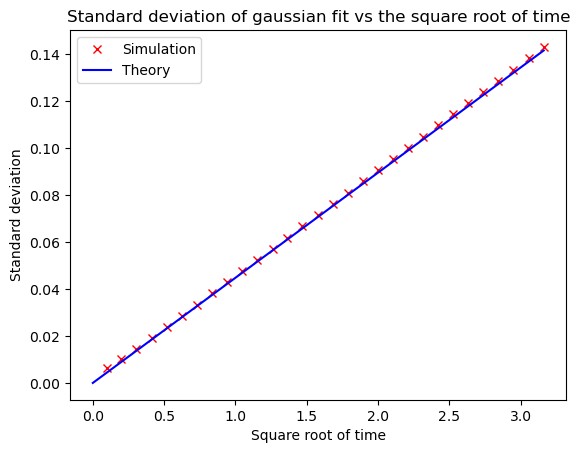

In [49]:
# Plot of Gaussian width vs sqrt(t) here:
"""This code will plots the fitted standard deviations against
theoretical predictions for the evolution of the standard
deviation of the normal distribution with time."""

# array used for plotting theoretical std-time evolution
ptarr = np.linspace(0, 10, 1000)

plt.figure(1)  # specifies plot figure
# plots fitted standard deviations against the square root of time
plt.plot(np.sqrt(tarr), stds, "rx")
# plots theoretical evolution of standard deviations -
# against the square root of time
plt.plot(np.sqrt(ptarr), np.sqrt(2 * D * ptarr), "b")
# labels the simulation data and theoretical predictions
plt.legend(['Simulation', 'Theory'])
# labels the axis of plot
plt.ylabel('Standard deviation')
plt.xlabel('Square root of time')
# names the plot
plt.title('Standard deviation of gaussian fit vs the square root of time')
plt.show()  # makes sure plot is shown

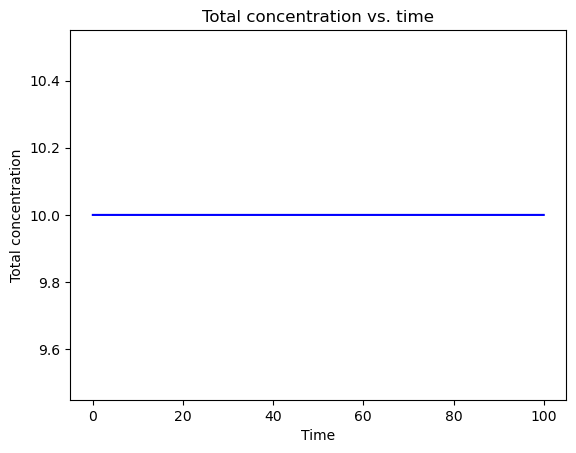

In [50]:
# Plot of particle count (sum of non-phantom C) vs t here:
"""This code plots total concentration over time for the simulation
to ensure the amount of dye in the dish stays the same."""

plt.figure(2)  # specifies plot figure
# plots sum of concentrations against time
plt.plot(np.arange(steps + 1) * dt, pc, "b")
# labels the axis of plot
plt.xlabel('Time')
plt.ylabel('Total concentration')
# names the plot
plt.title('Total concentration vs. time')
plt.show()  # makes sure plot is shown

### Your answers to text questions for Part 5 questions here. There is an ungraded, un-timed and not-style-checked cell below for you to do your work for anwering these questions

Answer the following questions in the space provided in this cell.

**5a)** What happens to the animation when dt is too large?

When dt is too large the animation renders partially transparent pixels in the center which slowly expands. The rest of the dish in the animation quickly becomes coloured before slowing down to an eventual stable-ish final configuration.


**5b)** What is the value of dt where the simulation diverges? 

The simulation diverges for values of dt greater than or equal to 0.0247.


**5c)** What is the value of $dt \, D/dx^2$ where the simulation starts to diverge? 

0.252


**5d)** What happens to the sums you generate for question (4) when the simulation diverges?  

They remain around 10 for the first part of the simulation but gradually diverge.


**5e)** If you use a grid of only 51x51 points, where is the threshold for dt to converge now? 

The new value of dt forwhich the simulation begins to diverge is 0.0985. (Interesting note this keeps the value found for 5c relatively the same)


c:\Users\logan\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


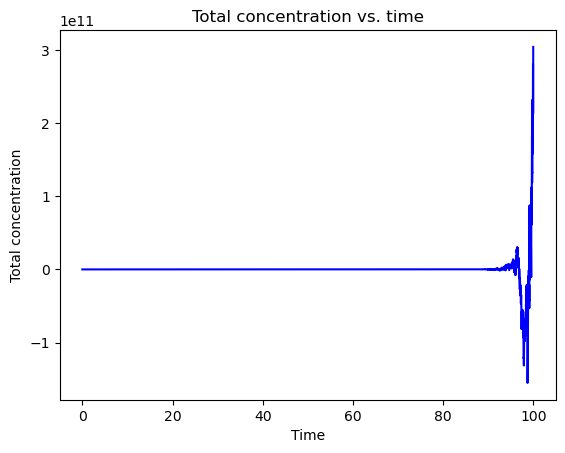

In [18]:
# Main code and animation here
"""This code simulates a the diffusion of a dye in a 2 dimensional
1x1 dish of water across 100 seconds with diffusion constant D = 0.001
The dish is modelled as a square grid 101 points wide with reflecting
boundary conditions. An animation of the simulation will be produced
and the distribution of the dye particle concentration will be
fitted to a gaussian distribution at multiple time intervals."""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit as fit
from IPython.display import HTML

D = 0.001  # diffusion constant
L = 1  # length of dish
# number of points along side of square dish (including phantom points)
N = 101
tmax = 100  # end time of simulation
dt = 0.0247  # size of timestep
steps = int(tmax / dt)  # number of steps in simulation
framesteps = int(0.2 / dt)  # number of steps per frame
# the steps for which to fit the concentration to the gaussian distribution
gsteps = np.asarray(np.linspace(np.sqrt(0.01), np.sqrt(10), 30)**2 / dt,
                    dtype=int)

xarr = np.linspace(0, L, N)  # array used for fitting gaussian distribution
tarr = gsteps * dt  # array used for plotting simualtion std data

guesses = (4, 1)  # initial guesses for gaussian fit

dx = L / N  # x step
dy = L / N  # y step

# defines starting conditions for concentration array C
C = np.zeros(shape=(N, N))
C[N // 2, N // 2] = 10

fig = plt.figure(0)  # defines a figure fopr use in animation

ims = []  # empty list used for animation frames

stds = []  # empty list used for fitted standard deviations

pc = []  # empty list used for sums of concentration array


# From https://www.geeksforgeeks.org/python-gaussian-fit/
def gaussian(x, A, sigma):
    """Gaussian distribution fitting function.

    x: the position of distribution value.
    A: the amplitude of the gaussian distribution.
    sigma: the standard deviation of the gaussian distribution.

    returns the gaussian distribution value"""
    return A * np.exp(-(x - L / 2)**2 / (2 * sigma**2))


for s in range(steps + 1):
    pc.append(np.sum(C[1:-1, 1:-1]))  # appends total concentration

    Cc = np.copy(C)  # copys concentration array

    # updates all real points in C based on diffusion equation
    C[1:-1, 1:-1] = D * dt * (
        (Cc[1:-1, 2:] + Cc[1:-1, 0:-2] - 2 * Cc[1:-1, 1:-1]) / dx**2 +
        (Cc[2:, 1:-1] + Cc[0:-2, 1:-1] - 2 * Cc[1:-1, 1:-1]) / dy**2) + Cc[
            1:-1, 1:-1]

    del Cc  # deletes copy of C to save memory

    # sets boundary points to be reflections of adjacent 'real' points
    C[:, 0] = C[:, 1]
    C[:, -1] = C[:, -2]
    C[0, :] = C[1, :]
    C[-1, :] = C[-2, :]

    # tests if this step should be an animated frame
    if s % framesteps == 0:
        # appends frame as a heatmap tuple
        ims.append((plt.pcolormesh(C, cmap='magma'), ))

    # tests if this step should be fitted to a gaussian distribution
    if s in gsteps:
        garr = C[N // 2, :]  # extracts the desired dish region, C(x, L/2, t)
        # fits region of C to gaussian distribution
        params, pcov = fit(gaussian, xarr, garr, p0=guesses)
        # appends standard deviation of fit to a list
        stds.append(np.absolute(params[1]))
        # updates new guesses to old parameters
        guesses = np.copy(params)

# animates the frames stored in ims
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat=False)
# saves animation as a webm file to drive
ani.save('Diffusion.webm', extra_args=['-vcodec', 'libvpx'])
del ani  # deletes animation from memory
plt.close()  # prevents stray plot from appearing

# Plot of particle count (sum of non-phantom C) vs t here:
"""This code plots total concentration over time for the simulation
to ensure the amount of dye in the dish stays the same."""

plt.figure(2)  # specifies plot figure
# plots sum of concentrations against time
plt.plot(np.arange(steps + 1) * dt, pc, "b")
# labels the axis of plot
plt.xlabel('Time')
plt.ylabel('Total concentration')
# names the plot
plt.title('Total concentration vs. time')
plt.show()  # makes sure plot is shown

# displays animation in notebook
HTML('<video controls> <source src="Diffusion.webm" ' +
     'type="video/webm"></video>')

# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_



# Extension Code and Description
All solution code for the main project question should appear in the two main cells above above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

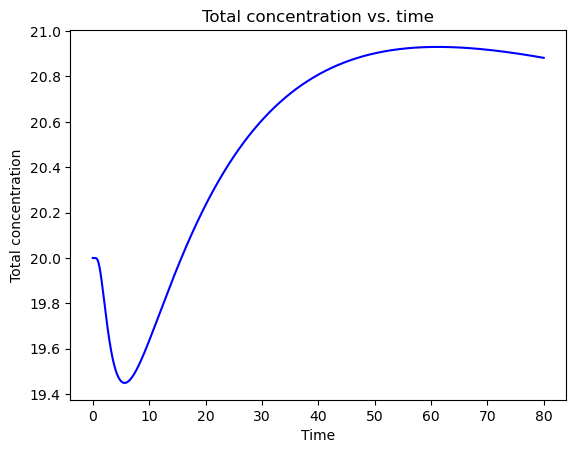

In [59]:
# Main code and animation here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit as fit
from IPython.display import HTML

D1 = 0.0006
D2 = 0.002
L = 1  # length of dish
N = 81  # number of points along side of square dish (including phantom points)
tmax = 100  # end time of simulation
dt = 0.01  # size of timestep
steps = int(tmax / dt)  # number of steps in simulation
framesteps = int(0.2 / dt)

xarr = np.linspace(0, L, N)
tarr = gsteps * dt

guesses = (4, 1)

dx = L / N
dy = L / N

C = np.zeros(shape=(N, N))
C[N // 3, N // 2] = 10
C[int(N // 1.5), int(N // 2)] = 10

fig = plt.figure(1)

ims = []

pc = []


for s in range(steps + 1):

    pc.append(np.sum(C[1:-1, 1:-1]))

    Cc = np.copy(C)

    C[1:N // 2, 1:-1] = D1 * dt * (
        (Cc[1:N // 2, 2:] + Cc[1:N // 2, 0:-2] - 2 * Cc[1:N // 2, 1:-1]) / dx**2 +
        (Cc[2:N // 2 + 1, 1:-1] + Cc[0:N // 2 - 1, 1:-1] - 2 * Cc[1:N // 2, 1:-1]) / dy**2) + Cc[
            1:N // 2, 1:-1]

    C[N // 2:-1, 1:-1] = D2 * dt * (
        (Cc[N // 2:-1, 2:] + Cc[N // 2:-1, 0:-2] - 2 * Cc[N // 2:-1, 1:-1]) / dx**2 +
        (Cc[N // 2 + 1:, 1:-1] + Cc[N // 2 - 1:-2, 1:-1] - 2 * Cc[N // 2:-1, 1:-1]) / dy**2) + Cc[
            N // 2:-1, 1:-1]

    del Cc

    C[:, 0] = C[:, 1]
    C[:, -1] = C[:, -2]
    C[0, :] = C[1, :]
    C[-1, :] = C[-2, :]

    if s % framesteps == 0:
        ims.append((plt.pcolormesh(C, cmap='magma', shading='flat'), ))


ani = animation.ArtistAnimation(fig, ims, interval=50, repeat=False)
ani.save('DiffusionExtension.webm', extra_args=['-vcodec', 'libvpx'])
del ani
plt.close()

# Plot of particle count (sum of non-phantom C) vs t here:
plt.figure(2)
plt.plot(np.arange(steps + 1) * dt, pc, "b")
plt.xlabel('Time')
plt.ylabel('Total concentration')
plt.title('Total concentration vs. time')

HTML('<video controls> <source src="DiffusionExtension.webm" ' +
     'type="video/webm"></video>')


_In this cell, please describe any new language features or project extension you have implemented:_

My extension code simulated the top and bottom regions of the dish having different diffusion constants. This could be interpreted as 2 different temperature regions of the dish somehow seperated so that the dye particles may cross but the medium may not, preventing the temperature from changing in the 2 distinct regions. (Simulation does not preserve total concentration as noted by plot of total concentration vs time)


# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [53]:
# 1. Code execution (grader use only)

In [54]:
# 2. Style: pep8 (see note below regarding use of the Format button to fix many errors)
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project05.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking cell: cell-project5-1
checking cell: cell-project5-2
checking cell: cell-project5-3
checking cell: cell-project5-5
Style errors or warnings found:
16:80: E501 line too long (85 > 79 characters)
39:1: E302 expected 2 blank lines, found 1
41:1: W293 blank line contains whitespace
45:1: W293 blank line contains whitespace
49:1: E305 expected 2 blank lines after class or function definition, found 1
51:1: W293 blank line contains whitespace
53:1: W293 blank line contains whitespace
56:80: E501 line too long (155 > 79 characters)
57:1: W293 blank line contains whitespace
67:1: W293 blank line contains whitespace


AssertionError: 

Also note that you can use the Format button while in a code cell to automagically fix most pep8 errors (other than way too long print statements)

![](project02-format.png)

In [ ]:
# 3. Results (grader use only)

In [ ]:
# 4. Readability (grader use only)

In [ ]:
# 5. Plot (grader use only)

In [ ]:
# Check execution time
nb_name = "project05.ipynb"
cells_to_time = []
stop_at = ['cell-extension']
%run -i time_cells2.py

In [ ]:
# 5. Code optimization/timing (grader use only)

In [ ]:
# B2. New Functionality/Language features (grader use only)